### 🏥 HEALTHCARE DATA ANALYSIS DASHBOARD
Healthcare Data Analysis Dashboard using Python (Pandas, Seaborn, Matplotlib) to uncover cost drivers, hospital efficiency, disease burden, and insurance impact for actionable insights.

### 📝 Problem Definition
Healthcare systems generate large amounts of data, but high treatment costs, long hospital stays, and varying efficiency across hospitals make it difficult to identify cost drivers and improve patient care. There is a need to analyze patient, disease, hospital, and insurance data to extract actionable insights.

### 💼 Business Understanding
The objective is to leverage healthcare data to:
- 📊 Identify cost drivers such as diseases, age groups, and outcomes.
- 🏥 Evaluate hospital efficiency by comparing costs and length of stay.
- 💳 Understand the impact of insurance on covering healthcare expenses.
- 👨‍⚕️ Support policymakers and insurers in designing effective healthcare strategies.

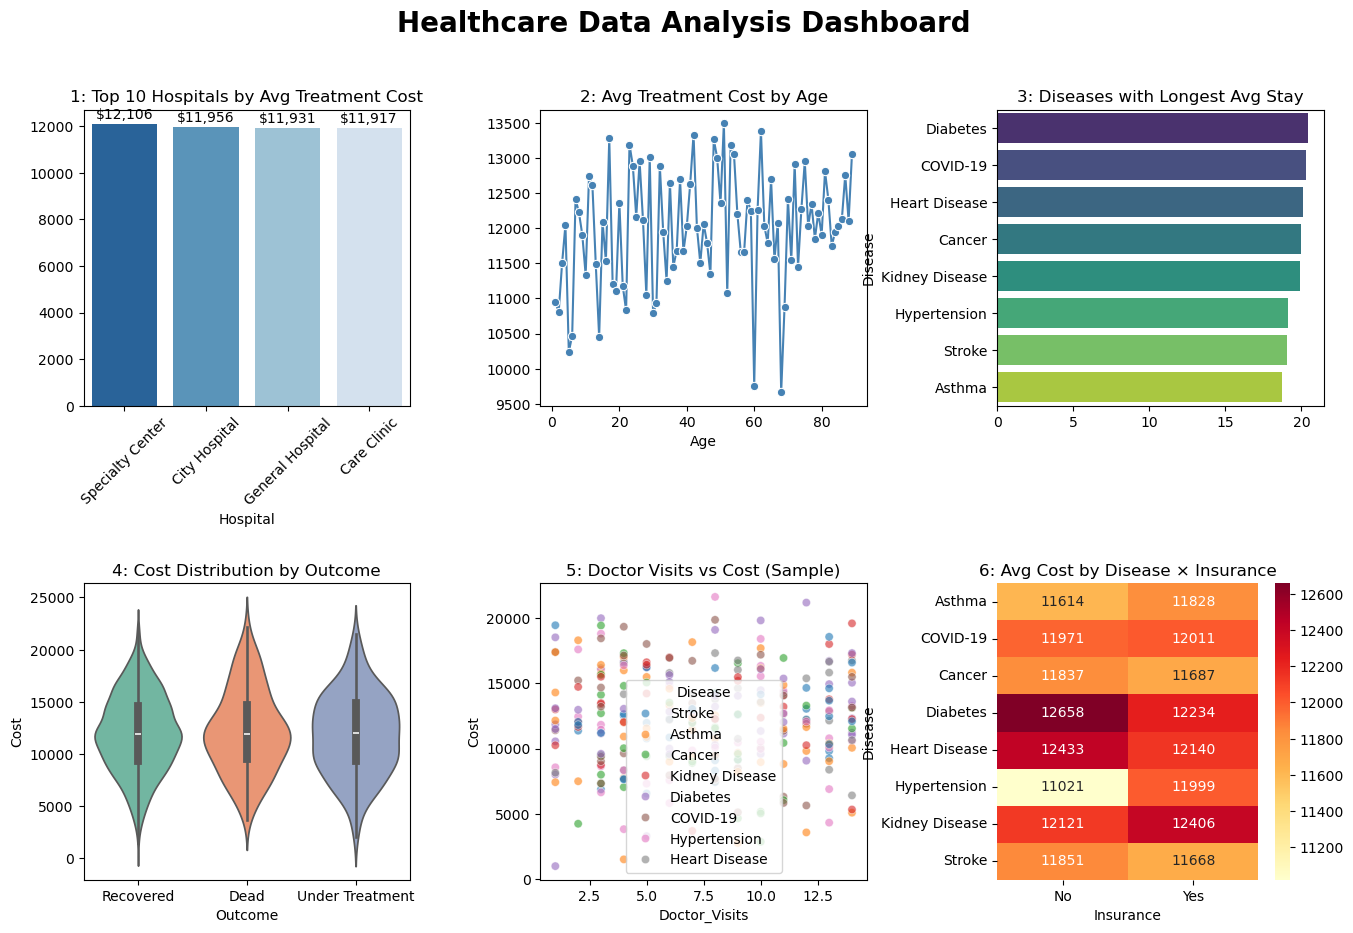


📖 Key Insights
1. Highest cost hospital = Specialty Center with avg cost ≈ 12106.20
2. Costliest age group = 51 yrs with avg cost ≈ 13498.32
3. Longest stay disease = Diabetes with avg stay ≈ 20.4 days
4. Most expensive outcome = Dead with avg cost ≈ 12161.46
5. Correlation Doctor_Visits-Cost = -0.00
6. Highest avg insurance coverage = Yes with avg cost ≈ 12002.94


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/hp/Desktop/Data analyst/Healthcare-Data-Analysis-Dashboard/data/Health_Care.csv")

# Data Cleaning
df = df.dropna()
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")
df["Length_of_Stay"] = pd.to_numeric(df["Length_of_Stay"], errors="coerce")
df["Doctor_Visits"] = pd.to_numeric(df["Doctor_Visits"], errors="coerce")

# === Dashboard Visualization ===
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
insights = {}

# 1) Top Hospitals by Avg Cost
avg_hospital = df.groupby("Hospital")["Cost"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_hospital.index, y=avg_hospital.values,
            hue=avg_hospital.index, palette="Blues_r",
            dodge=False, legend=False, ax=axes[0,0])
axes[0,0].set_title("1: Top 10 Hospitals by Avg Treatment Cost")
axes[0,0].tick_params(axis="x", rotation=45)
for i, v in enumerate(avg_hospital.values):
    axes[0,0].text(i, v + 100, f"${v:,.0f}", ha='center', va='bottom')
insights["1"] = f"Highest cost hospital = {avg_hospital.index[0]} with avg cost ≈ {avg_hospital.iloc[0]:.2f}"

# 2) Cost vs Age
avg_age = df.groupby("Age")["Cost"].mean()
sns.lineplot(x=avg_age.index, y=avg_age.values, marker="o", ax=axes[0,1], color="steelblue")
axes[0,1].set_title("2: Avg Treatment Cost by Age")
insights["2"] = f"Costliest age group = {avg_age.idxmax()} yrs with avg cost ≈ {avg_age.max():.2f}"

# 3) Diseases with Longest Stay
disease_stay = df.groupby("Disease")["Length_of_Stay"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=disease_stay.values, y=disease_stay.index,
            hue=disease_stay.index, palette="viridis",
            dodge=False, legend=False, ax=axes[0,2])
axes[0,2].set_title("3: Diseases with Longest Avg Stay")
insights["3"] = f"Longest stay disease = {disease_stay.index[0]} with avg stay ≈ {disease_stay.iloc[0]:.1f} days"

# 4) Cost by Outcome
sns.violinplot(x="Outcome", y="Cost", data=df,
               hue="Outcome", palette="Set2",
               dodge=False, legend=False, ax=axes[1,0])
axes[1,0].set_title("4: Cost Distribution by Outcome")
outcome_cost = df.groupby("Outcome")["Cost"].mean().sort_values(ascending=False)
insights["4"] = f"Most expensive outcome = {outcome_cost.index[0]} with avg cost ≈ {outcome_cost.iloc[0]:.2f}"

# 5) Doctor Visits vs Cost
sample = df.sample(min(300, len(df)), random_state=0)
sns.scatterplot(x="Doctor_Visits", y="Cost", hue="Disease", alpha=0.6, data=sample, ax=axes[1,1])
axes[1,1].set_title("5: Doctor Visits vs Cost (Sample)")
insights["5"] = f"Correlation Doctor_Visits-Cost = {sample['Doctor_Visits'].corr(sample['Cost']):.2f}"

# 6) Insurance × Disease Cost
pivot = df.pivot_table(values="Cost", index="Disease", columns="Insurance", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd", ax=axes[1,2])
axes[1,2].set_title("6: Avg Cost by Disease × Insurance")
ins_total = df.groupby("Insurance")["Cost"].mean().sort_values(ascending=False)
insights["6"] = f"Highest avg insurance coverage = {ins_total.index[0]} with avg cost ≈ {ins_total.iloc[0]:.2f}"

plt.suptitle("Healthcare Data Analysis Dashboard", fontsize=20, weight="bold")
plt.show()

# === Insights ===
print("\n📖 Key Insights")
for q, text in insights.items():
    print(f"{q}. {text}")


### ✅ Conclusion
The analysis reveals that:

- 🏥 Some hospitals achieve lower costs with shorter stays, indicating efficiency.
- 🧬 Chronic diseases like Diabetes, Cancer, and Heart Disease drive up costs and hospital stays.
- 💳 Insurance covers most costs, but optimizing policies can further reduce patient burden.
- 🔄 Readmissions and deaths are the costliest outcomes, highlighting the need for preventive care and follow-up programs.
  
**Recommendation:**
Focus on preventive healthcare, share best practices across hospitals, optimize insurance coverage, and strengthen patient follow-up programs to reduce costs and improve outcomes.
